# Programming Assignment 7

The goal of this assignment is to build familiarity with Matplotlib by replicating some figures as closely as possible.

The assignment contains some cells that obtain data over the internet that you need to work with. Don't worry about how this code words. In the end, it will give you some numpy arrays, which you will use. 

***You may not use any packages other than Numpy and Matplotlib to complete this assignment. Use only the functions introduced in class notebooks, but you may use additional arguments and keywords for those functions.***

***Reviewing Matplotlib class notebook will help complete this assignment.*** Here are some additional resources

* [Matplotlib cheatsheets](https://matplotlib.org/cheatsheets/)
* [`subplots` reference](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)
* [`scatter` reference](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)


#### Basic and Advanced figures
Full credit will be given for recreating the Basic figure in each task below. A small bonus will be given for recreating the Advanced figure, but you will learn some more advanced Matplotlib capabilities. Pick *either* the Basic or Advanced figure, so your submitted notebook produces just one figure per part. 

## 1. Line plots

In this task, you will plot daily weather data from a NOAA Global Histoical Climatology Network daily (GHCNd) station in [Millbrook, NY](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:US1NYDT0008/detail). 

Recreate one of the two figures below (Basic or Advanced) using Matplotlib commands introduced in class notebooks.

Tips:
* The figure is 8x8 inches.
* The `plt.subplots()` function controls how many subplots there are. See class notebook.
* Your colors should generally match the examples, but can differ somewhat in hue (e.g. different shades of purple or blue.)
* The exact labeled dates on the x-axis may differ from the example.
* Your legend may appear in a different location in the Basic figure, but should match the example if recreating the Advanced figure. 
* The Advanced figure uses the sharex keyword for `plt.subplots()` and also `tight_layout()`.

#### Basic figure
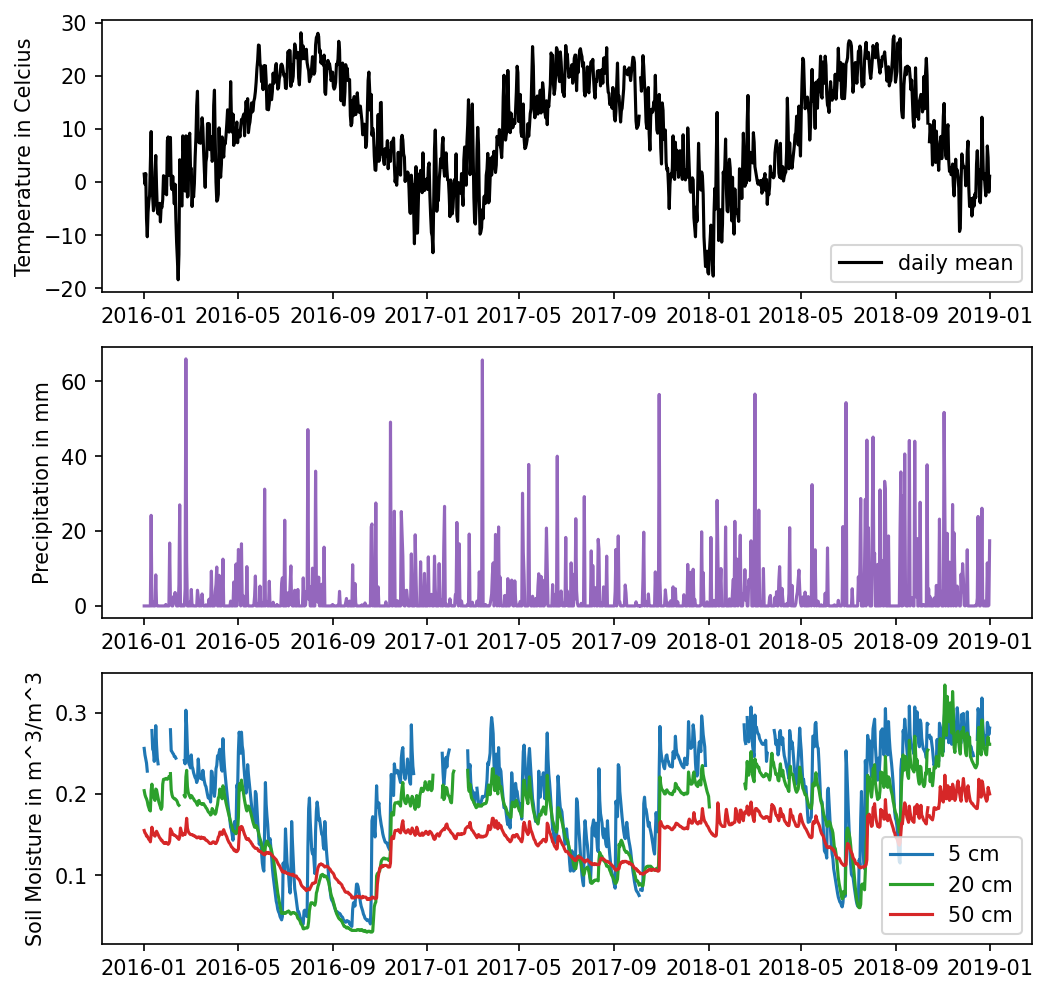

#### Advanced figure
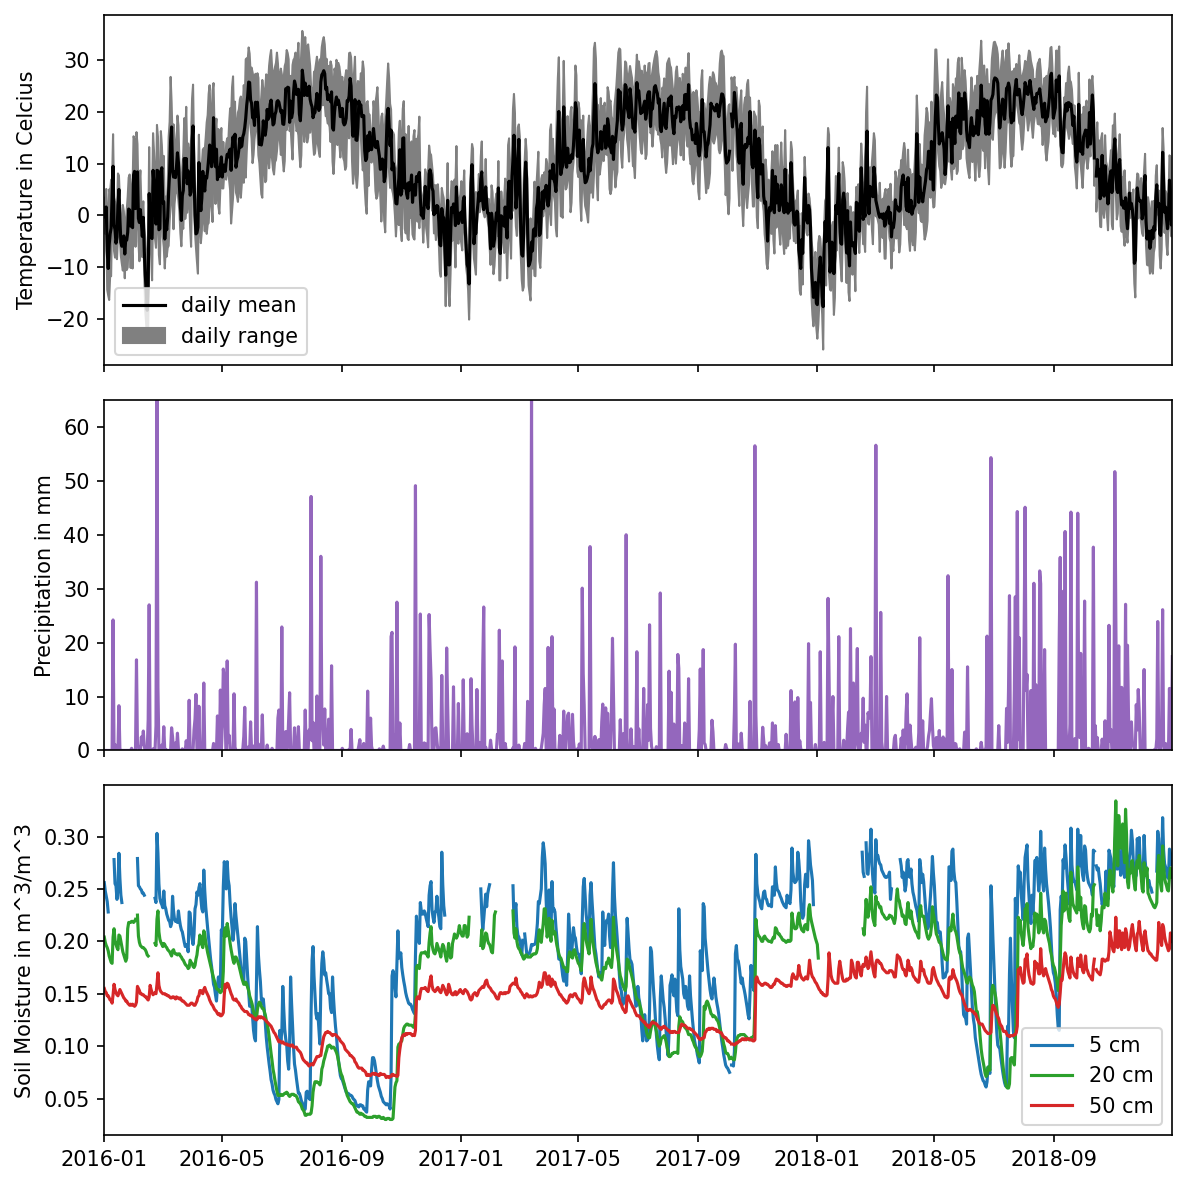

The next cell uses the Pandas package to read data from a web server. The data are then transferred to several Numpy arrays (`t_daily_min`, `t_daily_mean`, `t_daily_max`, etc.). You don't need to understand the how this process works. Just work with the Numpy arrays and recreate one of the following figures. 

In [ ]:
# Do not modify this cell!

# Download data
import pandas as pd
try:
    import pooch
except ModuleNotFoundError:
    %conda install pooch
    import pooch

POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    base_url="doi:10.5281/zenodo.5553029/",
    registry={
        "HEADERS.txt": "md5:2a306ca225fe3ccb72a98953ded2f536",
        "CRND0103-2016-NY_Millbrook_3_W.txt": "md5:eb69811d14d0573ffa69f70dd9c768d9",
        "CRND0103-2017-NY_Millbrook_3_W.txt": "md5:b911da727ba1bdf26a34a775f25d1088",
        "CRND0103-2018-NY_Millbrook_3_W.txt": "md5:5b61bc687261596eba83801d7080dc56",
        "CRND0103-2019-NY_Millbrook_3_W.txt": "md5:9b814430612cd8a770b72020ca4f2b7d",
        "CRND0103-2020-NY_Millbrook_3_W.txt": "md5:cd8de6d5445024ce35fcaafa9b0e7b64"
    },
)

with open(POOCH.fetch("HEADERS.txt")) as fp:
    data = fp.read()
lines = data.split('\n')
headers = lines[1].split(' ')

dframes = []
for year in range(2016, 2019):
    fname = f'CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(POOCH.fetch(fname), parse_dates=[1],
                     names=headers, header=None, sep=r'\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays)  
#### NO PANDAS ALLOWED!
#########################################################

t_daily_min = df.T_DAILY_MIN.values
t_daily_max = df.T_DAILY_MAX.values
t_daily_mean = df.T_DAILY_MEAN.values
p_daily = df.P_DAILY_CALC.values
soil_moisture_5cm = df.SOIL_MOISTURE_5_DAILY.values
soil_moisture_10cm = df.SOIL_MOISTURE_10_DAILY.values
soil_moisture_20cm = df.SOIL_MOISTURE_20_DAILY.values
soil_moisture_50cm = df.SOIL_MOISTURE_50_DAILY.values
soil_moisture_100cm = df.SOIL_MOISTURE_100_DAILY.values
date = df.index.values

In [ ]:
# Write your code here
# Use these variables defined in the cell above: date, t_daily_min, t_daily_max, t_daily_mean, 
# p_daily (precipitation), soil_moisture_5cm, soil_moisture_10cm, soil_moisture_20cm, 
# soil_moisture_50cm, soil_moisture_100cm

## 2. Pcolormesh plots

Next, visualize last month's global temperature data from the NCEP-NCAR atmospheric reanalysis. 

Tips
* The figure size is 8x4 inches (width x height)
* Use the `cmap` keyword for `pcolormesh()`
* The white line is produced by `contour()` with a level of 0 (i.e. the 0°C contour).
* For the Advanced figure, read the [`subplots()` documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) to find keywords that control width.

#### Basic figure
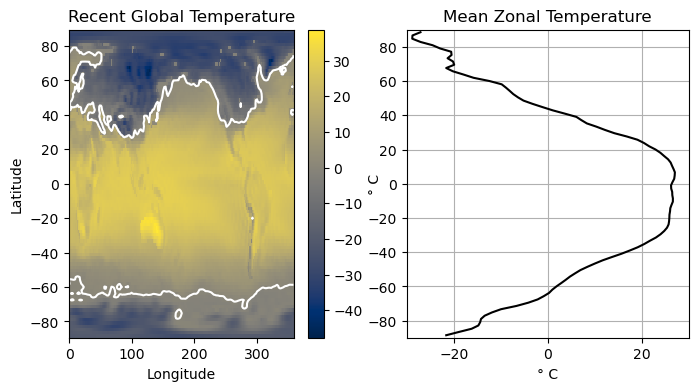

#### Advanced figure

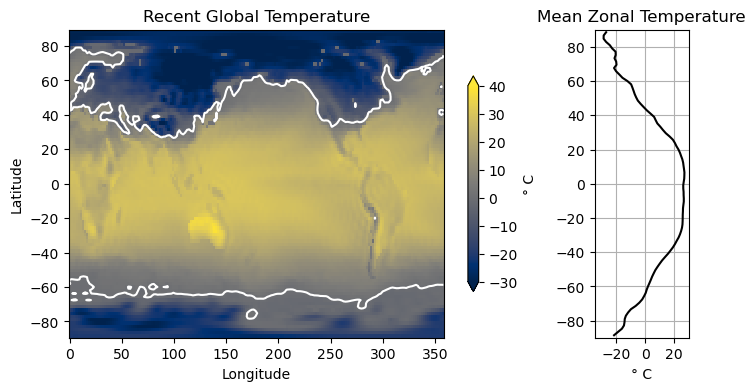

The data are read from a server using the Xarray package in the next cell, but you don't need to know how that works. As in the previous task, you should work with the Numpy arrays named at the bottom of the following cell.

In [ ]:
# Do not modify this cell!

# Download data
import xarray as xr
ds_url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Diagnostic/.surface/.temp/dods'
ds = xr.open_dataset(ds_url, decode_times=False)

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays) 
#### NO XARRAY ALLOWED!
#########################################################

temperature = ds.temp[-1].values - 273.15 # convert from Kelvin to Celsius
lon = ds.X.values
lat = ds.Y.values

In [ ]:
# Write your code here
# Use these variables defined in the cell above: lat, lon, temperature
# lat is latitude, lon is longitude, temperature is in Celsius

## 3. Scatter plots

This task will map earthquakes from a USGS catalog of historic large earthquakes. 

Tips
* The figure size is 7x4 inches (width x height).
* Set the marker size to be magnitude<sup>4</sup>/100.
* For the advanced figure, color the eathquakes by log10(depth). It's OK if you can't format the superscript exponents in the advanced colorbar. 
* Colormaps can be reversed by adding '_r' to the colormap name. For example, 'viridis' is purple to yellow, while 'viridis_r' is yellow to purple.

#### Basic figure
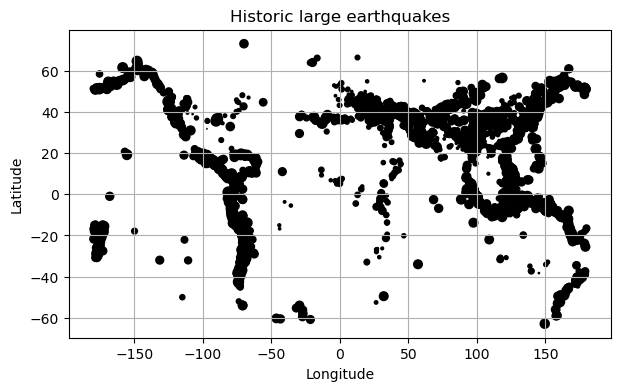

#### Advanced figure
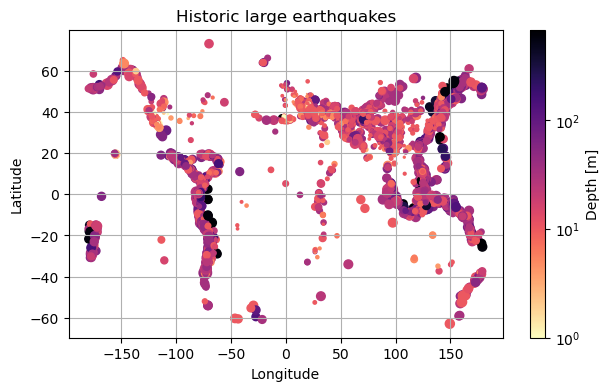

In [ ]:
import numpy as np
fname = pooch.retrieve(
    "https://rabernat.github.io/research_computing/signif.txt.tsv.zip",
    known_hash='22b9f7045bf90fb99e14b95b24c81da3c52a0b4c79acf95d72fbe3a257001dbb',
    processor=pooch.Unzip()
)[0]

earthquakes = np.genfromtxt(fname, delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]

In [ ]:
# Write your code here
# Use these variables defined in the cell above: latitude, longitude, magnitude, depth